# Ridge and Lasso Regression- techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.
## Advertising Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
ad=pd.read_csv('D:/ShakthiSai -Keerthana BABI and Learnings/AI and Machine Learning/Regression-Linear,Ridge, Lasso,Polynomial,Stepwise/Om-Lasso and Ridge Regression-Python Code/ISL-Ridge-Lasso-master/data/Advertising.csv')

In [3]:
ad.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
ad.drop(['Unnamed: 0'],axis=1, inplace=True)

In [7]:
ad.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
ad.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
ad.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

## Linear Regression-Least Square Fit

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import cross_val_score

In [13]:
X=ad.drop(['sales'],axis=1)

In [14]:
y=ad['sales']

In [16]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [22]:
y.values.reshape(-1,1)

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [10.6],
       [ 8.6],
       [17.4],
       [ 9.2],
       [ 9.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [12.5],
       [ 5.6],
       [15.5],
       [ 9.7],
       [12. ],
       [15. ],
       [15.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [ 9.6],
       [17.4],
       [ 9.5],
       [12.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [12.9],
       [ 8.5],
       [14.9],
       [10.6],
       [23.2],
       [14.8],
       [ 9.7],
       [11.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [15.7],
       [14. ],
       [18. ],
       [ 9.3],
       [ 9

### "cross_val_score" splits the data into say 5 folds. Then for each fold it fits the data on 4 folds and scores the 5th fold. Then it gives you the 5 scores from which you can calculate a mean and variance for the score. You crossval to tune parameters and get an estimate of the score.

In [20]:
lr=LinearRegression()
mses=cross_val_score(lr,X,y,scoring='neg_mean_squared_error', cv=5)
print(mses)
mean_mses=np.mean(mses)
print(mean_mses)

[-3.1365399  -2.42566776 -1.58522508 -5.42615506 -2.79114519]
-3.07294659710021


## Ridge Regression

In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection  import GridSearchCV

## Gridsearchcv picks the optimal parameter from the grid search and uses it with the estimator selected by the user.
### This technique is used to find the optimal parameters to use with an algorithm.
### Hyper-parameters are like the k in k-Nearest Neighbors (k-NN). k-NN requires the user to select which neighbor to consider when calculating the distance. 
### We can find optimal vaue of hyperparameters( here K) using gridsearchcv

In [25]:
ridge=Ridge()
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [27]:

ridge_regressor.best_score_

-3.072671338341143

In [28]:
ridge_regressor.best_params_

{'alpha': 20}

## Lasso Regression

In [29]:
from sklearn.linear_model import Lasso
from sklearn.model_selection  import GridSearchCV

In [30]:
lasso=Lasso()
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X,y)

C:\Users\Vikee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202.6330184067651, tolerance: 0.43829494374999994
  positive)
C:\Users\Vikee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228.2169839442834, tolerance: 0.45029244375
  positive)
C:\Users\Vikee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159.3201080483578, tolerance: 0.41992074374999994
  positive)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [31]:
lasso_regressor.best_params_

{'alpha': 1}

In [33]:
lasso_regressor.best_score_

-3.041405896751369

##  Train Test Split and Predictions

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

In [41]:
prediction_lasso

array([ 9.96100568,  7.45147336,  7.22304685, 24.02887164, 12.24281078,
        6.65213419, 12.40887894, 15.34281152, 10.56655762, 16.33763173,
       22.8054732 ,  9.1867709 , 10.66780067, 15.48652818, 11.42724713,
       12.1246199 , 18.83717546, 10.33736872, 15.51426455, 17.29758581,
       24.06140774,  9.79509452, 15.16347836, 12.4295689 ,  5.8500301 ,
       15.00900397, 12.43638995, 20.67505007, 13.70868718,  8.90135213,
       12.8508565 , 21.18541234, 18.40753001, 21.04822679,  6.56003019,
        6.11400326,  7.96320871, 13.27721498, 14.32762209,  6.19985934,
       11.80684756,  8.99177435, 14.94073869, 16.39021484, 17.20544424,
       13.16018911,  3.81817899, 11.82928768, 15.54969177,  8.8621467 ,
       10.67737988, 19.44541046, 18.53687448, 15.33576364,  9.81466231,
        8.19657317, 21.6064866 , 14.23751533, 16.37790826,  8.52889349])

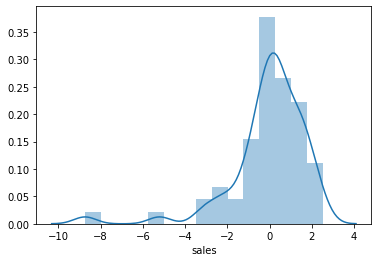

In [39]:
import seaborn as sns
sns.distplot(y_test-prediction_lasso)

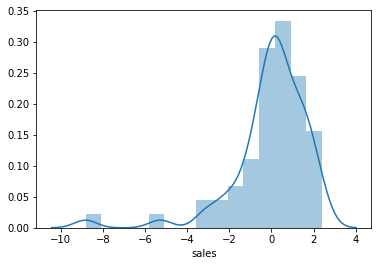

In [40]:
sns.distplot(y_test-prediction_ridge)

## we see that ridge graph is more stable than lasso